# Logistic Regression using SKLearn


**Learning Outcomes**

1. Use sklearn to train LogR
2. Appreciate the linear decision boundaries of LogR
3. Examine the coefficients of the LogR generated by sklearn


In this exercise you will use sklearn logistic regression model in order to train a binary classifier on synthetic data.
You will see how the classifier generates a linear decision boundaries although its activation function is non-linear logistic


In [6]:
%matplotlib inline

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Generate the Data

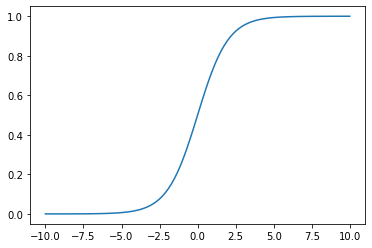

In [8]:
def sig(z):
    return 1/(1 + np.exp(-z))
x = np.linspace(-10, 10, num = 100)
plt.plot(x, sig(x))

def get_x2(x1, c=4):
    return 20*x1 + c
    
def getData(n  = 10):    
    x1 = np.linspace(0, 1, num = n)
    x2 = get_x2(x1)                     #2*x1 - 4 #12
    x2 = np.random.normal(x2,20)        # get the second attribute (add noise so data is realistic)
    
    return x1, x2

In [9]:
def LinC12(x1, x2):    
    LM   = -x2 + get_x2(x1)          #2*X1 - 4  # linear model decision boundary
    ind1 = LM >=  0
    ind0 = LM <   0

    C1 = [x1[ind1], x2[ind1]]       # Actual Class1
    C0 = [x1[ind0], x2[ind0]]       # Actual Class0
    
    targets = ind1*1.0             # targets can be deduced form the positive class     

    return C1, C0, LM, targets

In [10]:
def plotC12(C0, C1, s=200):
    plt.scatter(C1[0],C1[1], s=s,color='b',    marker='+', label= 'Class1')
    plt.scatter(C0[0],C0[1], s=s,color='none', marker='o', label= 'Class0', edgecolor='red')    

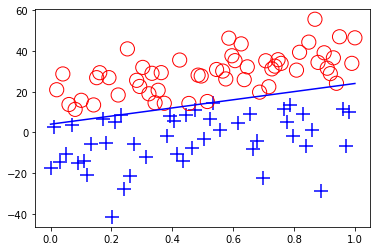

In [11]:
X1, X2 = getData(100)
C1, C0, LM1, targets = LinC12(X1, X2) # separate the classes with a linear boundaries

plotC12(C0, C1)                       # plot the two classes
plt.plot(X1,get_x2(X1),'b')           # plot the boundary

[[ 0.90698813 -0.86474523]] [10.60778534]
0.10101010101010102
9.781319917707527e-06


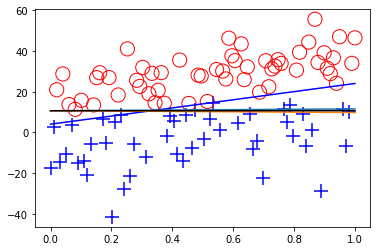

In [12]:
X = np.array([X1, X2]).T
Y = targets
#print(X)
logreg = LogisticRegression(max_iter=100)
logreg.fit(X, Y)

print(logreg.coef_, logreg.intercept_)
print(X[10,0])
print(sig(X[10,0]*2+4-X[10,1]))
logreg.predict(X[10,:].reshape(1, -1) )

plotC12(C0, C1)                       # plot the two classes
plt.plot(X1,get_x2(X1),'b')           # plot the boundary
plt.plot(X1,logreg.coef_[0,0]*X1 +logreg.intercept_ )
plt.plot(X1,logreg.coef_[0,1]*X1 +logreg.intercept_ )
plt.plot(X1,logreg.coef_[0,0]*X1 + logreg.coef_[0,1]*X1 +logreg.intercept_ , 'k')


In [8]:
logreg1 = LogisticRegression(C=1e5, max_iter=10000)
logreg1.fit(X1.reshape(100, 1), Y)
print(logreg1.coef_, logreg1.intercept_)

[[0.58124926]] [-0.45211588]


Plot the decision boundary. Hence, we will assign a colour to each.

In [9]:
# point in the mesh [x_min, x_max]x[y_min, y_max].
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
print(np.c_[xx1.ravel(), xx2.ravel()])

[[ -0.5       -29.9787125]
 [ -0.48      -29.9787125]
 [ -0.46      -29.9787125]
 ...
 [  1.44       73.5412875]
 [  1.46       73.5412875]
 [  1.48       73.5412875]]


[1. 1. 1. ... 0. 0. 0.]


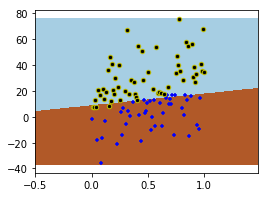

In [10]:
Z = logreg.predict(np.c_[xx1.ravel(), xx2.ravel()])
print(Z)
# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.figure(1, figsize=(4, 3))

plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Paired)
plt.scatter(C1[0],C1[1], s=20,color='b', marker='+', label= 'Class1')
plt.scatter(C0[0],C0[1], s=20,color='k', marker='o', label= 'Class0', edgecolor='y')   
